In [119]:
# Importing Pandas, Numpy, and Seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
# Import the dataset
df = pd.read_csv('nobel.csv')

In [121]:
# Display the first 5 rows of the dataset
print(df.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

In [122]:
# Display the column names of the dataset
print(df.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


In [123]:
# Display the shape of the dataset
print(df.shape)

(1000, 18)


In [124]:
# Check if there are any missing values in the dataset
print(df.isna().sum())

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64


In [125]:
# Analysis : What is the most commonly awarded gender and birth country?
# Filling the missing values with unkown and storing common gender and birth country
df['sex'] = df['sex'].fillna('Unknown')
df['birth_country'] = df['birth_country'].fillna('Unknown')
top_gender = df['sex'].value_counts().idxmax()
top_country = df['birth_country'].value_counts().idxmax()
print(f'The most commonly awarded gender is {top_gender} and the most commonly awarded birth country is {top_country}')

The most commonly awarded gender is Male and the most commonly awarded birth country is United States of America


<Axes: xlabel='sex', ylabel='count'>

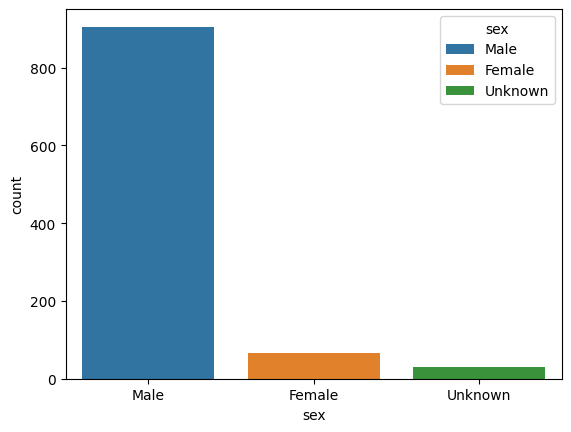

In [126]:
# Visualize the distribution of sex and birth country
sns.countplot(x='sex', hue='sex', data=df, legend=True)

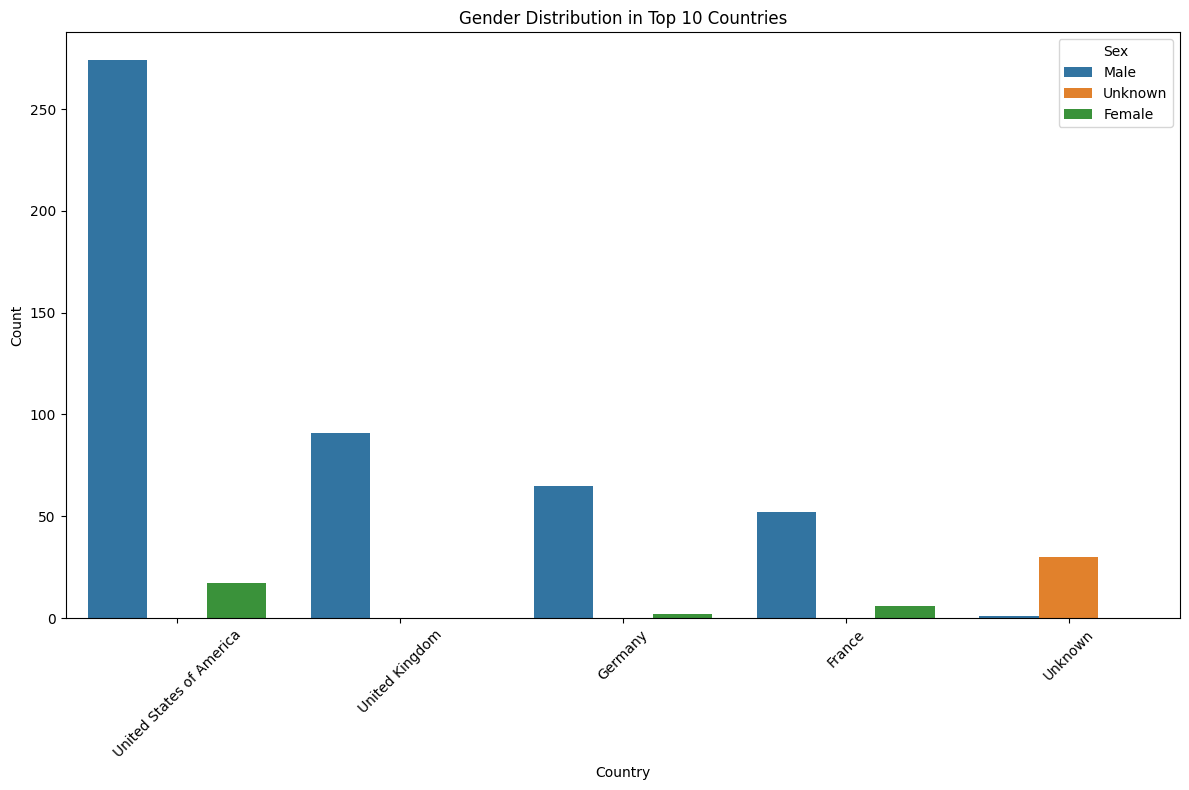

In [127]:
# Visualize top 5 countries with distribution of sex in each country
top_countries = df['birth_country'].value_counts().head(5).index
plt.figure(figsize=(12,8))  # Increase the size of the plot
sns.countplot(x='birth_country', hue='sex', data=df[df['birth_country'].isin(top_countries)], order=top_countries)
plt.title('Gender Distribution in Top 10 Countries')  # Add a title
plt.xlabel('Country')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sex')  # Add a title to the legend
plt.tight_layout()  # Adjust subplot params so that the subplot fits into the figure area
plt.show()

In [128]:
# Analysis 2: What decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
# Extract the year of the prize from the 'year' column
df['decade'] = df['year'] // 10 * 10
df['us_born_winner'] = df['birth_country'] == 'United States of America'
df['us_born_winner'] = df['us_born_winner'].astype(int)
df['total_winners'] = 1
df['us_born_ratio'] = df['us_born_winner'] / df['total_winners']
decade_us_born_ratio = df.groupby('decade')['us_born_ratio'].mean()
decade_us_born_ratio = decade_us_born_ratio.dropna()
max_decade_usa = decade_us_born_ratio.idxmax()
print(f'The decade with the highest ratio of US-born Nobel Prize winners to total winners is {max_decade_usa}')

The decade with the highest ratio of US-born Nobel Prize winners to total winners is 2000


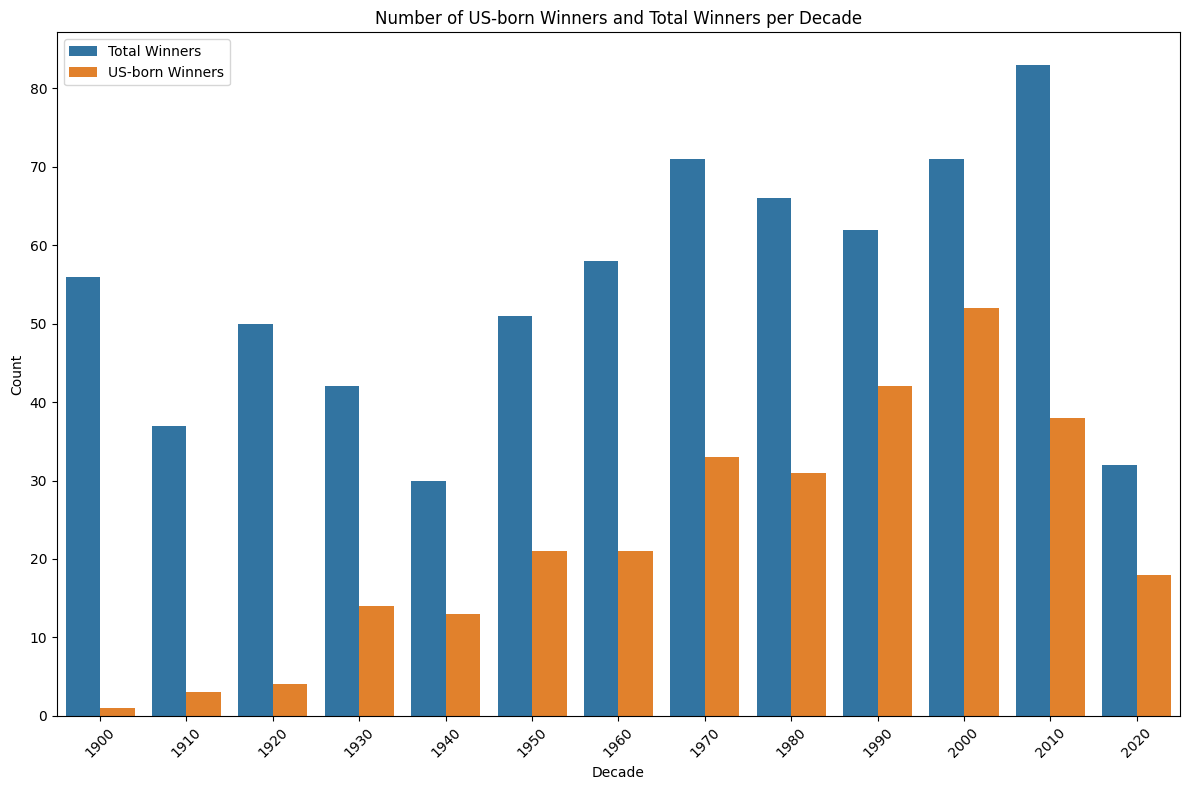

In [129]:
# Visualize the number of US-born winners and total winners per decade
plt.figure(figsize=(12, 8))
sns.countplot(x='decade', hue='us_born_winner', data=df)
plt.title('Number of US-born Winners and Total Winners per Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Total Winners', 'US-born Winners'])
plt.tight_layout()
plt.show()

In [130]:
# Analysis 3: Which decade and Nobel Prize category combination had the highest proportion of female laureates?
# Check for Nobel Prize category with highest proportion of female per decade
df['female_winner'] = df['sex'] == 'Female'
df['female_winner'] = df['female_winner'].astype(int)
df['female_winner_ratio'] = df['female_winner'] / df['total_winners']
decade_category = df.groupby(['decade','category'])['female_winner_ratio'].mean()
decade_category = decade_category.unstack()
max_female_combination = decade_category.stack().idxmax()
max_female_dict = {max_female_combination[0] : max_female_combination[1]}
print(max_female_dict)
highest_decade, highest_category = next(iter(max_female_dict.items()))
print(f'The decade and Nobel Prize category combination with the highest proportion of female laureates is {highest_decade} and {highest_category}')

{2020: 'Literature'}
The decade and Nobel Prize category combination with the highest proportion of female laureates is 2020 and Literature


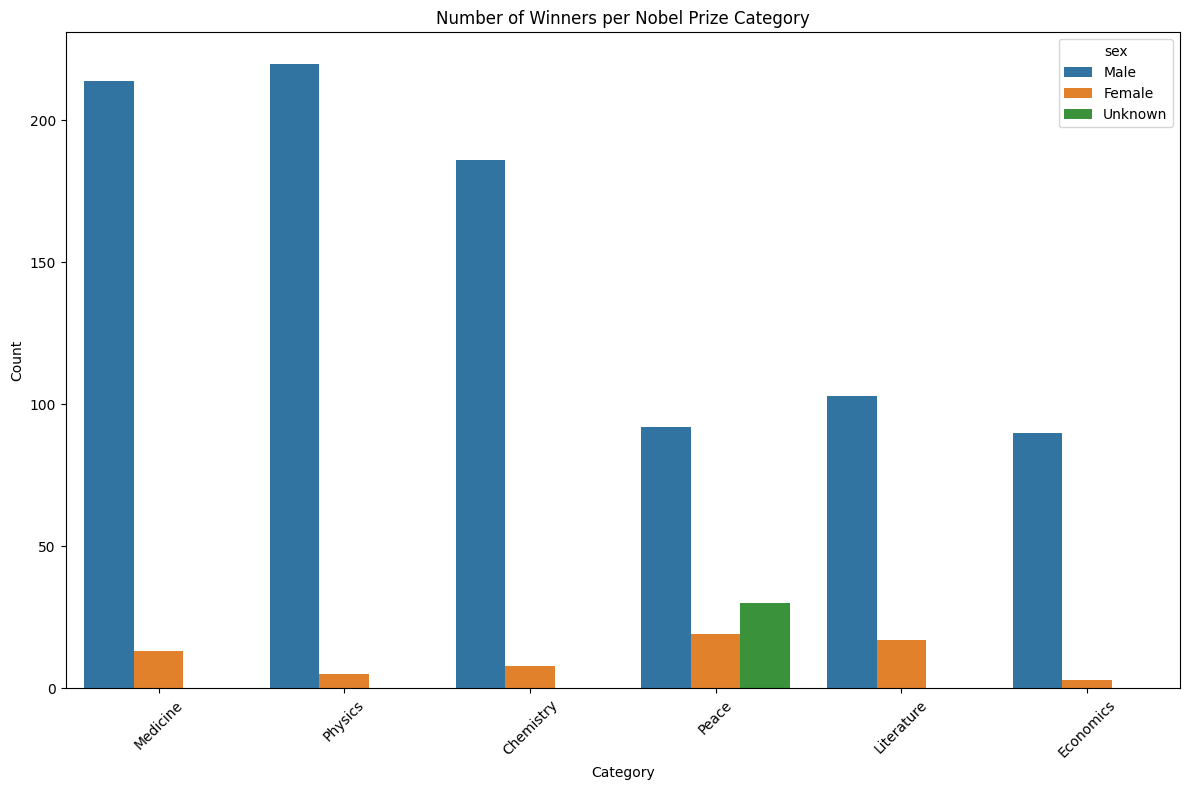

In [131]:
# Visualize the Nobel Categories with the highest winners and show gender distribution in those categories
plt.figure(figsize=(12, 8))
sns.countplot(x='category', hue='sex', data=df, order=df['category'].value_counts().index)
plt.title('Number of Winners per Nobel Prize Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [132]:
# Analysis 4: Who was the first woman to receive a Nobel Prize, in what category?
first_female_winner = df[df['female_winner'] == 1].sort_values('year').iloc[0]
first_woman_name, first_woman_category = first_female_winner[
    'full_name'], first_female_winner['category']
print(f'The first female Nobel Laureate is {first_woman_name} and she won for category {first_woman_category}')

The first female Nobel Laureate is Marie Curie, née Sklodowska and she won for category Physics


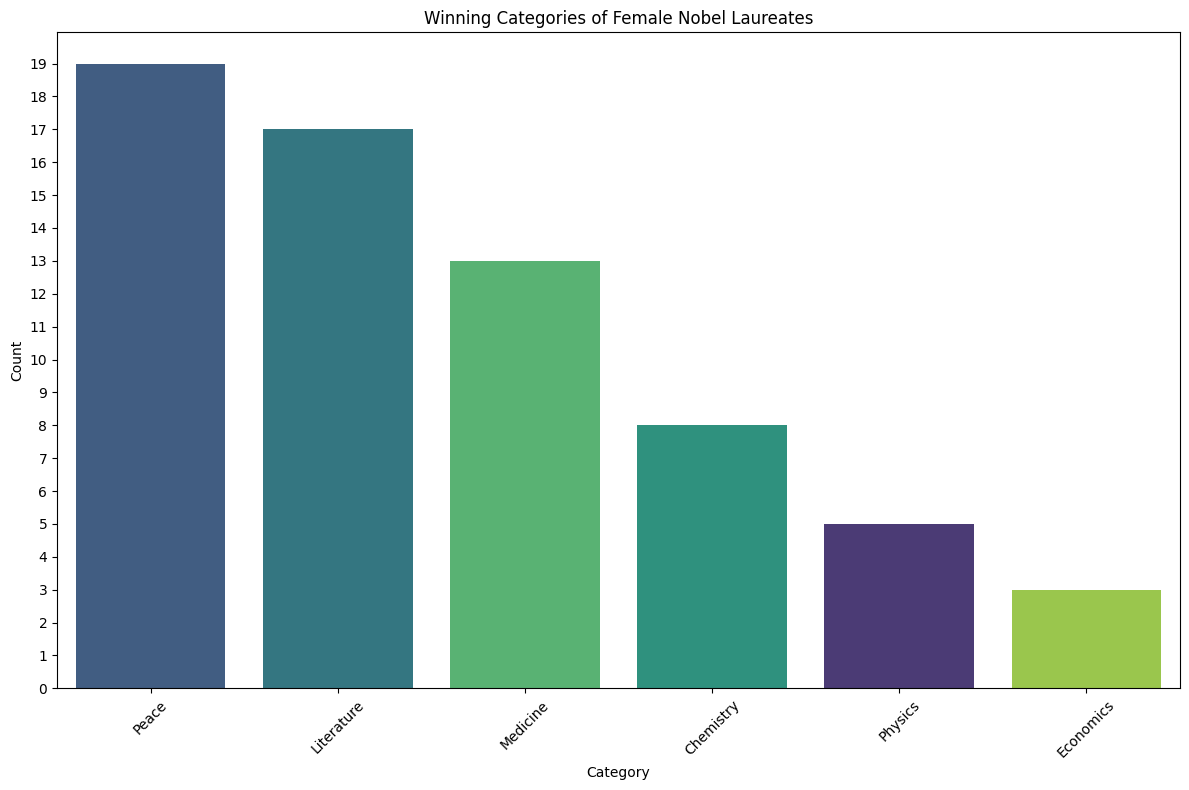

In [133]:
# Visualize the categories where the winners are female
plt.figure(figsize=(12, 8))
category_counts = df[df['female_winner'] == 1]['category'].value_counts()
sns.countplot(x='category', data=df[df['female_winner'] == 1], order=category_counts.index, hue='category',palette='viridis' )
plt.title('Winning Categories of Female Nobel Laureates')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(range(int(category_counts.max()) + 1))
plt.tight_layout()
plt.show()

In [134]:
# Analysis 5: Which individuals or organizations have won more than one Nobel Prize throughout the years?
# Check for individuals or organizations with more than one Nobel Prize
repeat_list = df['full_name'].value_counts()
repeat_list = repeat_list[repeat_list > 1].index.to_list()
print(f'The individuals or organizations that have won more than one Nobel Prize are: {repeat_list}')

The individuals or organizations that have won more than one Nobel Prize are: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
